# Assignment 1 : Single Neuron Neural Network (Logistic Regression)

### Module and Data Imports

### Importing libraries

In [236]:
%matplotlib inline
import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl   


In [237]:
dataset= pd.read_csv('https://raw.githubusercontent.com/abidi-b/Logistic-regression-and-neural-network-classification-models/main/data.csv')

In [238]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### data preprocessing
### checking shape of the dataset

In [239]:
dataset.shape

(569, 33)

### checking statistical values of the dataset

In [240]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Calculating null values of each column

In [242]:
df_null = round(100*(dataset.isnull().sum())/len(dataset), 2)
df_null

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

### dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction

In [243]:
dataset.drop(['Unnamed: 32', 'id'], inplace=True, axis=1)


In [244]:
dataset.diagnosis = [1 if each == "M" else 0 for each in dataset.diagnosis]

In [245]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### defining Input and Output data

In [246]:
y_train = dataset.diagnosis.values
x_data = dataset.drop(['diagnosis'], axis = 1)

### Splitting data for training and testing
### Shuffle your dataset

In [247]:
shuffle_df = dataset.sample(frac=1)
shuffle_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
477,0,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.1384,0.06222,0.2679,0.07698
387,0,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,...,15.51,19.97,99.66,745.3,0.08484,0.12330,0.1091,0.04537,0.2542,0.06623
23,1,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,0.1769,...,29.17,35.59,188.00,2615.0,0.14010,0.26000,0.3155,0.20090,0.2822,0.07526
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.09,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
65,1,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.090290,0.1953,...,17.31,33.39,114.60,925.1,0.16480,0.34160,0.3024,0.16140,0.3321,0.08911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.021070,0.1707,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.1020,0.05602,0.2688,0.06888
550,0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.000000,0.1661,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.0000,0.00000,0.2458,0.06592
292,0,12.950,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.033700,0.1730,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
557,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.000000,0.1742,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.0000,0.00000,0.2475,0.06969


In [248]:
X = np.array(shuffle_df.drop(["diagnosis"],1))
print("Shape of X:",X.shape)
print(X)
y = np.array(shuffle_df["diagnosis"])
print("Shape of y:",y.shape)
print(y)

Shape of X: (569, 30)
[[1.390e+01 1.662e+01 8.897e+01 ... 6.222e-02 2.679e-01 7.698e-02]
 [1.388e+01 1.616e+01 8.837e+01 ... 4.537e-02 2.542e-01 6.623e-02]
 [2.116e+01 2.304e+01 1.372e+02 ... 2.009e-01 2.822e-01 7.526e-02]
 ...
 [1.295e+01 1.602e+01 8.314e+01 ... 1.056e-01 3.380e-01 9.584e-02]
 [9.423e+00 2.788e+01 5.926e+01 ... 0.000e+00 2.475e-01 6.969e-02]
 [1.286e+01 1.332e+01 8.282e+01 ... 1.155e-01 2.382e-01 8.553e-02]]
Shape of y: (569,)
[0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0

### splitting

In [249]:
n_train_size = int(0.8 * X.shape[0])
n_test_size = int((1-0.8) * X.shape[0])


X_train = X[:n_train_size]
y_train = y[:n_train_size]
X_test = X[n_train_size:]
y_test = y[n_train_size:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 455
Total Number of rows in test: 114


### after splitting

In [250]:
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)
print("\nX_test")
print(X_test)
print("\ny_test")
print(y_test)

X_train:
[[1.390e+01 1.662e+01 8.897e+01 ... 6.222e-02 2.679e-01 7.698e-02]
 [1.388e+01 1.616e+01 8.837e+01 ... 4.537e-02 2.542e-01 6.623e-02]
 [2.116e+01 2.304e+01 1.372e+02 ... 2.009e-01 2.822e-01 7.526e-02]
 ...
 [1.917e+01 2.480e+01 1.324e+02 ... 1.767e-01 3.176e-01 1.023e-01]
 [1.549e+01 1.997e+01 1.024e+02 ... 2.121e-01 3.187e-01 1.019e-01]
 [1.361e+01 2.498e+01 8.805e+01 ... 1.184e-01 2.651e-01 7.397e-02]]

y_train:
[0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0

### Normalisation

In [251]:
X_train = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [252]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### considering X as an independent variable and y as a dependent variable:¶

In [253]:
X_train = dataset.drop('diagnosis', inplace=False, axis=1) #remove 'target' column from input features
y_train = dataset['diagnosis'] #stores target (1 or 0) in a separate array

#since we shuffled, the index numbers were messed up, this resets them
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True)

#convert to numpy arrays with float values
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float)

#reshape y_train to make matrix multiplication possible
y_train = np.array(y_train).reshape(-1, 1)

### Initializing weight and bias

### The main idea behind the ReLu activation function is to perform a threshold operation to each input element where values less than zero are set to zero

### using ReLu funtion

In [254]:
class Perceptron:
    def __init__(self, x, y):

        self.input = np.array(x, dtype=float) 
        self.label = np.array(y, dtype=float)
        self.weights = np.random.rand(x.shape[1], y.shape[1]) 
#randomly initialize the weights
        self.z = self.input@self.weights 
#dot product of the vectors
        self.yhat = self.relu(self.z) 
#apply activation function

 
    
    
#activation function
    def relu(self,x):
        
        return np.maximum(0,x)
    
# derivative of ReLu function
    
    def drelu(self, x):
        if x==0 or x<0:
            x=0
        else:
            x=1
        return x
    
#forward and backward propagation

    def forward_prop(self):
        self.yhat = self.relu(self.input @ self.weights) 
        #@ symbol represents matrix multiplication (also works for vectors)
        return self.yhat

    def back_prop(self):
        gradient = self.input.T @ (-2.0*(self.label - self.yhat)*self.relu(self.yhat))  
        #self.input is the x value

        self.weights -= gradient 
        #process of finding the minimum loss

### Forward-Backward Propagation + logistic regression

In [255]:
simple_nn = Perceptron(X_train, y_train)
training_iterations = 1000

history = [] #we will store how the mean squared error changes after each iteration in this array

def mse(yhat, y):
    sum = 0.0
    for pred, label in zip(yhat, y):
        sum += (pred-label)**2
    return sum/len(yhat)

for i in range(training_iterations):
    simple_nn.forward_prop()
    simple_nn.back_prop()
    yhat = simple_nn.forward_prop()
    history.append(mse(yhat, simple_nn.label))

    
    
yhat = simple_nn.forward_prop()

print(f'Final Mean Squared Error: {mse(yhat, simple_nn.label)}')

Final Mean Squared Error: [0.37258348]


Text(0.5, 0, 'Training Iteration')

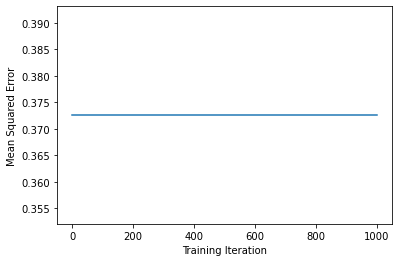

In [256]:
plt.plot(history)
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Iteration')

Text(0, 0.5, 'ReLU(x)')

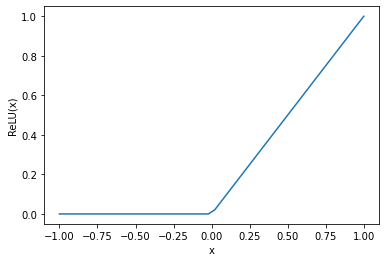

In [257]:
x = np.linspace(-1,1)
# x*(x>0) is equal to x for x>0
# and to 0 otherwise
plt.plot(x, x*(x>0))
plt.xlabel('x')
plt.ylabel('ReLU(x)')

### Log Loss Function

In [258]:
def binary_crossentropy(y, yhat):
  #code is derived from the piecewise function
  if y == 0:
    return -np.log(1.0-yhat)

  if y == 1:
    return -np.log(yhat)

y = 0 
yhat = 0.05 

print(f'Loss: {binary_crossentropy(y, yhat)}')

Loss: 0.05129329438755058


### Calculation of Confusion Matrix

In [259]:
def calculate_confusion_matrix(y_test, y_train):
    # extract all unique classes from the train y class
    unique_classes = np.unique(y_test)
    #   print('unique', unique_classes)

    # initialize a matrix with zero values that will be the final confusion matrix
    confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

    for i in range(len(unique_classes)):
        for j in range(len(unique_classes)):
            confusion_matrix[i, j] = np.sum((y_test == unique_classes[i]) & (y_train == unique_classes[j]))
            

    return confusion_matrix

print ("Confustion Matrix is")

print(calculate_confusion_matrix(y_test, y_train))

Confustion Matrix is
[[27846. 16536.]
 [12852.  7632.]]


### Labelling of Confusion Matrix tn, fp, fn, tp

In [260]:
def get_confusion_matrix(y_test, y_train):
    unique_classes = np.unique(y_test)
    
    unique_classes = unique_classes[::-1]
  # print('reversed unique', unique_classes) # will convert the above array to [1 0]

  # initialize a matrix with zero values that will be the final confusion matrix
  # For the binary class-label dataset, this confusion matrix will be a 2*2 square matrix
    confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

    for i in range(len(unique_classes)):
        for j in range(len(unique_classes)):
            confusion_matrix[i, j] = np.sum((y_test == unique_classes[j]) & (y_train == unique_classes[i]))

    return confusion_matrix

confusion_matrix_5_a = get_confusion_matrix(y_test, y_train)
print(confusion_matrix_5_a)

true_negative, false_positive, false_negative, true_positive = int(confusion_matrix_5_a[1][1]), int(confusion_matrix_5_a[0][1]), int(confusion_matrix_5_a[1][0]), int(confusion_matrix_5_a[0][0])    
    

[[ 7632. 16536.]
 [12852. 27846.]]


In [261]:
tn, fp, fn, tp = get_confusion_matrix(y_test, y_train).ravel()
print(tn, fp, fn, tp)
print(true_negative, false_positive, false_negative, true_positive)

7632.0 16536.0 12852.0 27846.0
27846 16536 12852 7632


### Calculating F1 Score and Accuracy Score

In [262]:
def get_f1_score_accuracy_score(binary_conf_matrix):
    true_negative  = binary_conf_matrix[1][1]    
    false_positive = 4*binary_conf_matrix[0][1]
    false_negative = binary_conf_matrix[1][0]
    true_positive = 4*binary_conf_matrix[0][0]

    precision = 4*true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)
    
    f1_score = (2 * (precision * recall)) / (precision + recall )
    
    sum_all_elements_of_confusion_matrix = np.concatenate(binary_conf_matrix).sum()
    
    accuracy_score = (true_positive + true_negative)/sum_all_elements_of_confusion_matrix
    
    return f1_score, accuracy_score


print("Function's f1 score and accuracy score is  ", get_f1_score_accuracy_score(confusion_matrix_5_a))  


Function's f1 score and accuracy score is   (0.9038905667081186, 0.8999167514568495)


### How would you write code to do regularization using the L1 (Lasso) method and L2 (Ridge) method?

#### Answer
#### - A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these two is the penalty term.
#### - Both L1 and L2 regularization aims to optimize the residual sum of squares (RSS) plus a regularization term. 
#### - For ridge regression (L2), this regularization term is the sum of the squared coefficients times a non-negative scaling factor lambda (or alpha in our sklearn model).
#### - As done for the typcial linear regression model,  again estimate this model's average RMSE in the same way for comparison. 
#### -First, it is done for alpha = 0.1, and then by using cross validation to estimate the optimal alpha that produces the minimum RMSE. 

In [263]:
### Pseudo code for L1 and L2

In [264]:
# from sklearn.linear_model import Lasso
# def lasso_regression(data, predictors, alpha, models_to_plot={}):
#     #Fit the model
#     lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
#     lassoreg.fit(data[predictors],data['y'])
#     y_pred = lassoreg.predict(data[predictors])
    
#     #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for alpha: %.3g'%alpha)
    
#     #Return the result in pre-defined format
#     rss = sum((y_pred-data['y'])**2)
#     ret = [rss]
#     ret.extend([lassoreg.intercept_])
#     ret.extend(lassoreg.coef_)
#     return ret



# from sklearn.linear_model import Ridge
# def ridge_regression(data, predictors, alpha, models_to_plot={}):
#     #Fit the model
#     ridgereg = Ridge(alpha=alpha,normalize=True)
#     ridgereg.fit(data[predictors],data['y'])
#     y_pred = ridgereg.predict(data[predictors])
    
#     #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for alpha: %.3g'%alpha)
    
#     #Return the result in pre-defined format
#     rss = sum((y_pred-data['y'])**2)
#     ret = [rss]
#     ret.extend([ridgereg.intercept_])
#     ret.extend(ridgereg.coef_)
#     return ret

## MIT License
Copyright (c) 2022 Butool Abidi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.